In [1]:
!pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4359 sha256=789c3a919ad50e3c7effafa8f8c92902bc070aa20e0ed70ce04b0479ab446dd0
  Stored in directory: c:\users\soe\appdata\local\pip\cache\wheels\66\4e\88\6de23ce74be839a953498c4ebdfa809ad7da9422ac89ae856c
Successfully built selectivesearch


In [63]:
import skimage.data
import selectivesearch
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [33]:
img = skimage.data.astronaut()

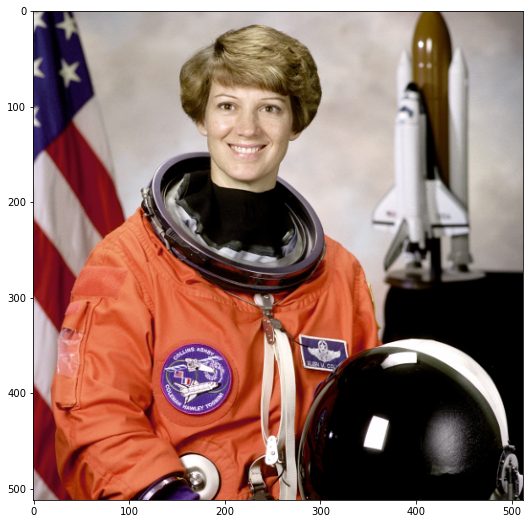

In [34]:
plt.figure(figsize=(16, 9))
plt.imshow(img)

In [38]:
img_ibl, regions = selectivesearch.selective_search(img, scale=500, sigma = 0.9, min_size=1000)

In [39]:
print(type(img_ibl))
print(img_ibl.shape)
print(type(regions))
print(len(regions))

<class 'numpy.ndarray'>
(512, 512, 4)
<class 'list'>
62


In [40]:
regions[:5]

[{'rect': (0, 0, 61, 155), 'size': 6349, 'labels': [0.0]},
 {'rect': (10, 0, 109, 227), 'size': 2098, 'labels': [1.0]},
 {'rect': (46, 0, 362, 326), 'size': 45561, 'labels': [2.0]},
 {'rect': (393, 0, 42, 187), 'size': 5547, 'labels': [3.0]},
 {'rect': (423, 0, 88, 269), 'size': 15778, 'labels': [4.0]}]

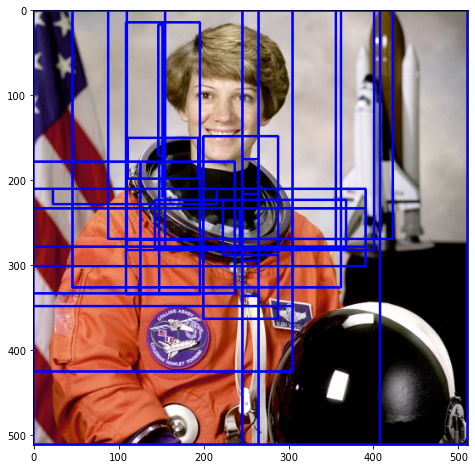

In [50]:
dst = img.copy()

cand_rect = [cand['rect'] for cand in regions if cand['size'] > 10000]

for rect in cand_rect:
    left, top, right, bottom = rect
    
    cv2.rectangle(dst, (left, top), (right, bottom), color=(0, 0, 255), thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(dst)

## IOU

In [83]:
def compute_iou(cand_box, gt_box): # input is pred and truth
    # Calculate intersection areas
    x1 = np.maximum(cand_box[0], gt_box[0]) # input 2 data, output is 1 of max data. 비교해서 큰 것 반환
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection
    iou = intersection / union
    return iou

index : 0 iou : 0.6196528433437432
index : 21 iou : 0.5709810184900792
index : 25 iou : 0.6912477286493035
index : 27 iou : 0.572914472600825
index : 28 iou : 0.7175472928897586
index : 30 iou : 0.572914472600825
index : 31 iou : 0.572914472600825
index : 32 iou : 0.572914472600825
index : 33 iou : 0.572914472600825


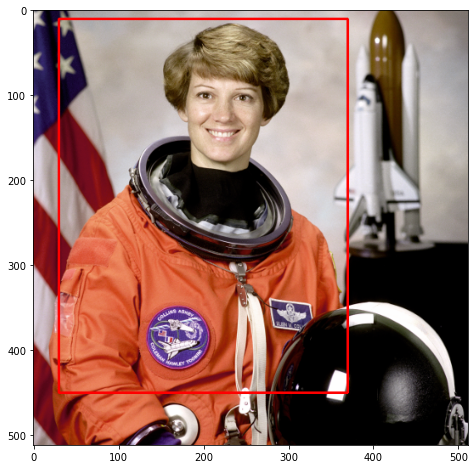

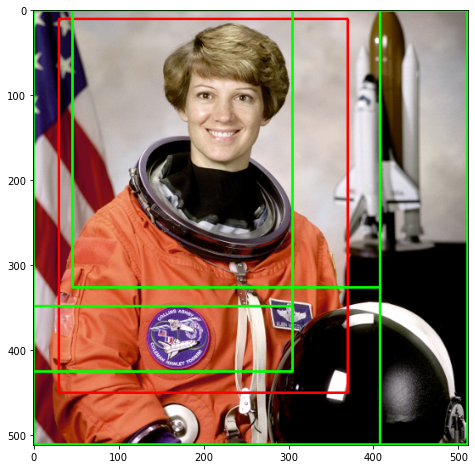

In [100]:
gt_box = [30, 10, 370, 450]
dst2 = img.copy()

cv2.rectangle(dst2, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=(255, 0, 0), thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(dst2)

cand_rect = [cand['rect'] for cand in regions if cand['size'] > 10000]
cand_rect[1]

for i, cand_box in enumerate(cand_rect):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    
    
    if iou > 0.5:
        print('index :', i, 'iou :', iou)
        cv2.rectangle(dst2, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=(0, 255, 0), thickness=2)
        #cv2.rectangle(dst2, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=(0, 0, 255), thinkness=2)

plt.figure(figsize=(8, 8))
plt.imshow(dst2)

index: 0 iou : 0.6196528433437432
index: 21 iou : 0.5709810184900792
index: 25 iou : 0.6912477286493035
index: 27 iou : 0.572914472600825
index: 28 iou : 0.7175472928897586
index: 30 iou : 0.572914472600825
index: 31 iou : 0.572914472600825
index: 32 iou : 0.572914472600825
index: 33 iou : 0.572914472600825


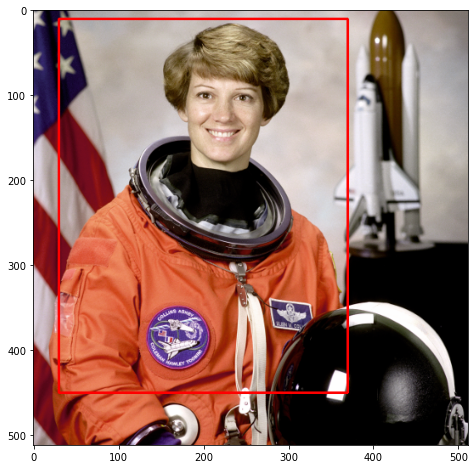

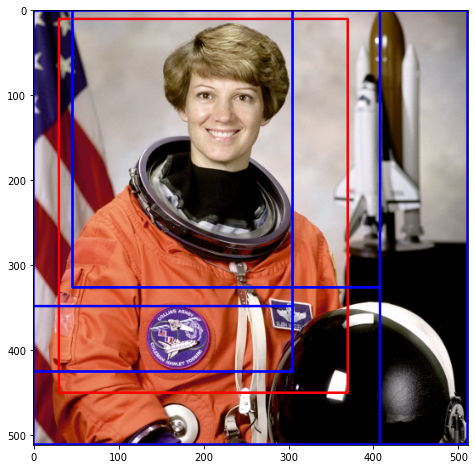

In [94]:
gt_box = [30, 10, 370, 450]
dst = img.copy()

cv2.rectangle(dst, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=(255, 0, 0), thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(dst)

cand_rects = [cand['rect'] for cand in regions if cand['size']>10000]
cand_rects

for i, cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    
    
    if iou > 0.5:
        print("index:", i, "iou :", iou)
        cv2.rectangle(dst, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=(0, 0, 255), thickness=2)
        
plt.figure(figsize=(8, 8))
plt.imshow(dst)
